# Machine Learning Engineer Nanodegree
## Capstone Proposal
Carlos Santillan

May 7, 2021

## Proposal

For the capstone project for the Udacity Machine Learning Nanodegree, I have selected the classification of dog images using Convolutional Neural Networks (CNN).

### Domain Background

Image classification is a common Machine Learning task, for this project we will be using different ML techniques and will compare the results obtained from them.

I will use different techniques to build an image classifier that will determine the breed of the dog.

Dog breed classification is a well tested machine learning.  For example the following paper describes building CNN to classify the breed, in order to help lost dogs be returned to their owners.

https://arxiv.org/pdf/2007.11986.pdf


### Problem Statement

The purpose of this project is to evaluate different machine learning techniques, and compare and constrast them. In order to do this I will use pre trained models, create a cnn from scratch and finally apply transfer learning techniques. 

I will use VGG-16 model pre trained against the ImageNet dataset to build a dog classifer. We will also create a CNN from scratch and train it with the Dog dataset, finally we wil use transfer learning to train a model 

I will use VGG-16 model pre trained against the ImageNet dataset to build a dog classifer. We will also create a CNN from scratch, finally I will use transfer learning to train a model.


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


#import cv2




In [8]:
print(tf.__version__)

2.5.0


### Datasets and Inputs

For this project I will be using the Standford Dog dataset, This dataset consists of 120 different dog breeds with around 150 images per breed for a total of 20,580 images. 
From this dataset I will for each different breed of dogs I will select a balanced subset of :


This is a popular dataset for dog breed classification models used in research. And it is also available on Kaggle Playground Prediction Competition https://www.kaggle.com/c/dog-breed-identification


The original data source is found on http://vision.stanford.edu/aditya86/ImageNetDogs/ 
```
@inproceedings{KhoslaYaoJayadevaprakashFeiFei_FGVC2011,
author = "Aditya Khosla and Nityananda Jayadevaprakash and Bangpeng Yao and
          Li Fei-Fei",
title = "Novel Dataset for Fine-Grained Image Categorization",
booktitle = "First Workshop on Fine-Grained Visual Categorization,
             IEEE Conference on Computer Vision and Pattern Recognition",
year = "2011",
month = "June",
address = "Colorado Springs, CO",
}
@inproceedings{imagenet_cvpr09,
        AUTHOR = {Deng, J. and Dong, W. and Socher, R. and Li, L.-J. and
                  Li, K. and Fei-Fei, L.},
        TITLE = { {ImageNet: A Large-Scale Hierarchical Image Database} },
        BOOKTITLE = {CVPR09},
        YEAR = {2009},
        BIBSOURCE = "http://www.image-net.org/papers/imagenet_cvpr09.bib"}
```

The dataset is also a part of tensorflow datatest: https://www.tensorflow.org/datasets/catalog/stanford_dogs
```
@misc{TFDS,
  title = { {TensorFlow Datasets}, A collection of ready-to-use datasets},
  howpublished = {\url{https://www.tensorflow.org/datasets}},
}
```

# Load dataset from tensorflow datasets
```
The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. There are 20,580 images, out of which 12,000 are used for training and 8580 for testing. Class labels and bounding box annotations are provided for all the 12,000 images.

```

In [9]:
standford_data,info = tfds.load("stanford_dogs",with_info=True,shuffle_files=True,as_supervised=True)

standford_train, standford_test = standford_data["train"], standford_data["test"]

assert isinstance(standford_train, tf.data.Dataset)

In [10]:
print(info)

tfds.core.DatasetInfo(
    name='stanford_dogs',
    full_name='stanford_dogs/0.2.0',
    description="""
    The Stanford Dogs dataset contains images of 120 breeds of dogs from around
    the world. This dataset has been built using images and annotation from
    ImageNet for the task of fine-grained image categorization. There are
    20,580 images, out of which 12,000 are used for training and 8580 for
    testing. Class labels and bounding box annotations are provided
    for all the 12,000 images.
    """,
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    data_path='C:\\Users\\csantill\\tensorflow_datasets\\stanford_dogs\\0.2.0',
    download_size=778.12 MiB,
    dataset_size=744.72 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
        'objects': Sequence({
            'bbo

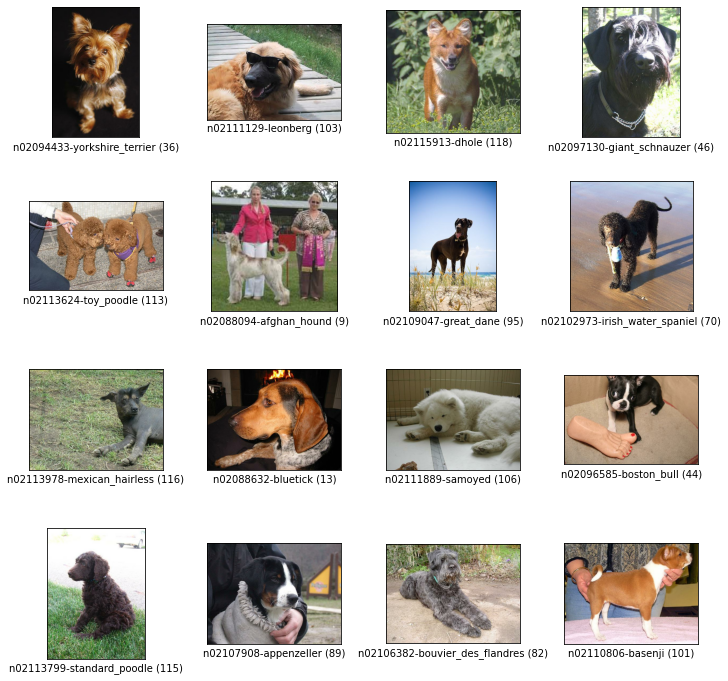

In [11]:
fig = tfds.show_examples(standford_train, info,    rows = 4,   cols =4)



In [12]:
for example in standford_train.take(1):
  X_train, Y_train = example["image"], example["label"]
  print(X_train)
  print(X_train.shape)
  print(Y_train)

TypeError: tuple indices must be integers or slices, not str

# VGG16



In [14]:
base_model_vg=VGG16(weights='imagenet')
base_model_vg.summary()

IMG_SIZE=224


# model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [15]:

label_names = [cl.split('-')[0] for cl in info.features["label"].names]

In [ ]:
IMG_SIZE=224

def show_image(img):
    plt.imshow(img)
    plt.show()
    
def resize_normalize(image,label):
    
    image = tf.cast(image,tf.float32)
#   image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    image = np.reshape(image,[1,224,224,3])
#     image = image / 255.0
    
    return image,label

def augmentimages(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
    return image

for example in standford_train.take(-1):
    #print(example)
    X_test, y_test = example[0], example[1]
    y=y_test
    print(X_test)
    X=resize_normalize(X_test,y)
    print(X)
    predict=base_model_vg.predict(X[0])
    print( np.argmax(predict))
    print("Predicted : ",decode_predictions(predict,top=5 ))
    print("Label :",info.features["label"].int2str(y_test))
    show_image(X_test)


In [ ]:

def resize(image):
  
    image['image']= tf.cast(image['image'],tf.float32)
    image['image'] = tf.image.resize(image['image'],(IMG_SIZE,IMG_SIZE))
    #image['image'] =tf.image.resize_image_with_crop_or_pad(image['image'],224,224)
#    image['image'] = np.reshape(image['image'],[1,224,224,3])
    #X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    #img = img / 255.0
  
    return image



train = standford_train.map(resize)

#train.reshape(train.shape[0], 1, 224, 224)

predict=base_model_vg.predict(train)

In [ ]:

def resize_normalize(image,label):
  
    image = tf.cast(image['image'],tf.float32)
    image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    #image = image / 255.0
  
    return image,label


def augmentimages(image, label):
    image = tf.image.random_flip_left_right(image)
    return image, label


def augment(image, label):
  
  image = tf.image.random_flip_left_right(image)
  
  image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
  
  return image,label

In [ ]:
train = standford_train.map(resize_normalize)

In [ ]:

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
plot_metric(history, 'loss')

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

    
def report_model(y_pred, y_test):
    predict_class = np.argmax(y_pred, axis=1)
    test_class = np.argmax(y_test, axis=1)
    print("Recall Score : ",recall_score(test_class,predict_class,average='micro'))
    print("Precision Score : ",precision_score(test_class,predict_class,average='micro'))
    print("F1 Score : ",f1_score(test_class,predict_class,average='micro'))
 
    print("=== Confusion Matrix ===")
#     draw_cm(test_class,predict_class,True)
    cm = confusion_matrix(test_class, predict_class)
    print(cm)
    print("=== Classification Report ===")
    print(classification_report(test_class, predict_class))
    
    

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator( horizontal_flip=True, rotation_range=30)
valtest_datagen = ImageDataGenerator()


train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=batch_size)
validation_generator = valtest_datagen.flow(np.array(X_val), y_val, batch_size=batch_size)
test_generator = valtest_datagen.flow(np.array(X_test), y_test, batch_size=batch_size)






In [ ]:
for example in ds.take(1):
  image, label = example["image"], example["label"]